In [1]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
print(x)

[[ 0.51123145 -0.11697552]
 [ 0.06316371 -0.73115232]
 [-0.0425064  -0.7081059 ]
 [-3.2891569  -2.01199214]
 [ 0.1111445   1.63493163]
 [-2.53070306  0.15599044]
 [-3.49036198  1.07782053]
 [ 0.3976447   0.80626713]
 [-0.24666899  0.74859527]
 [-3.65803446  0.75152794]
 [-3.47658131 -0.90114581]
 [-3.47815037 -0.1815243 ]
 [ 0.29004249 -2.98092432]
 [ 1.11761831  1.20500136]
 [-3.52530398  0.78302407]
 [ 0.69929128  0.42968688]
 [ 0.17089733 -0.73229726]
 [-3.57785124 -0.83930476]
 [ 0.12965489  0.83727062]
 [-3.46888717 -0.10255323]
 [-3.97487212  0.65867001]
 [-3.76348686  0.92649819]
 [-3.01519735  0.10216193]
 [ 1.92241659  0.46886454]
 [-2.91479578  0.45432938]
 [ 0.9259563   1.8613386 ]
 [-3.4859014  -0.79255991]
 [-2.73978345 -1.0004391 ]
 [-4.09896768 -0.53814137]
 [-3.50212636  0.44027716]
 [-3.13904797  0.27047889]
 [ 1.66188378 -0.75869267]
 [ 0.53718567  0.6802322 ]
 [ 0.84886927  0.17018845]
 [ 0.86681859 -1.01121977]
 [-0.00979785 -0.8394709 ]
 [-2.68650432  0.90327412]
 

In [3]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [5]:
import matplotlib.pyplot as plt

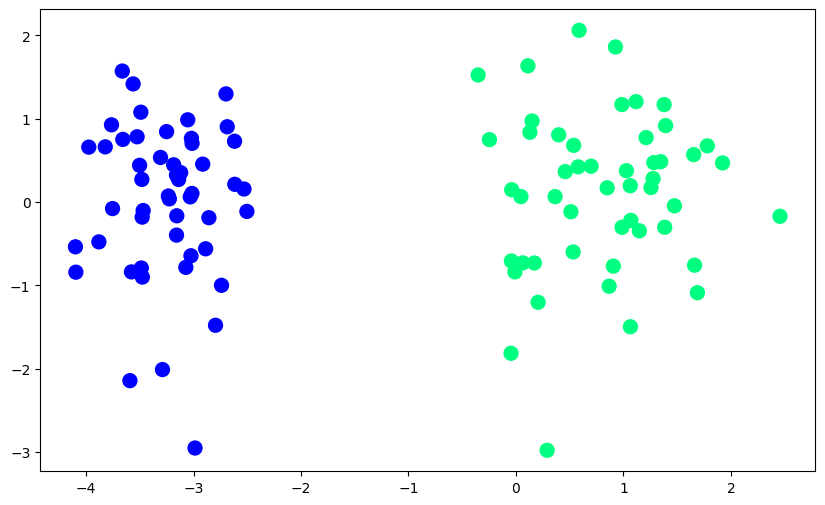

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty=None,solver='sag')
lr.fit(x,y)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[5.91288161 0.37811866]]
[5.9712615]


In [24]:
m=-(lr.coef_[0][0]/lr.coef_[0][1])
b=-(lr.intercept_/lr.coef_[0][1])
x_input=np.linspace(-3,3,100)
y_input=(m*x_input)+b

(-3.0, 2.0)

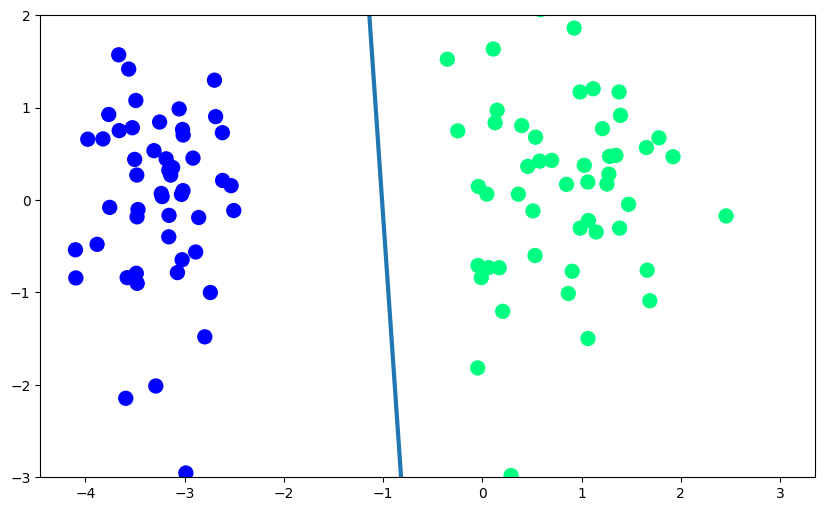

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [148]:
def gd(x,y):
    x=np.insert(x,0,1,axis=1)
    w=np.ones(x.shape[1])
    lr=0.5

    for i in range(10000):
        y_hat=sigmoid(np.dot(x,w))
        w=w+lr*(np.dot((y-y_hat),x)/x.shape[0])
    return (w[0],w[1:])

In [149]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [150]:
intercept_,coef_=gd(x,y)


In [151]:
intercept_

6.5330031774375

In [152]:
coef_

array([5.33086595, 0.25634171])

In [153]:
coef_.shape

(2,)

In [154]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [155]:
y_input1=m*x_input+b

(-3.0, 2.0)

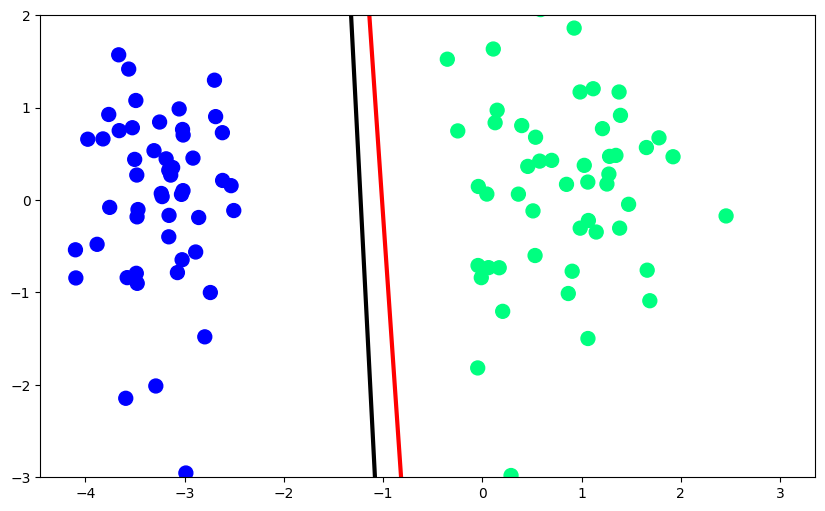

In [156]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)